In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pylab import rcParams

In [15]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
SEED = 123 #used to help randomly select the data points
DATA_SPLIT_PCT = 0.1
rcParams['figure.figsize'] = 8, 6
LABELS = ["Normal","Break"]

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from pylab import rcParams

import tensorflow as tf
from keras import optimizers, Sequential
from keras.models import Model
from keras.utils import plot_model
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed
from keras.callbacks import ModelCheckpoint, TensorBoard

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score

from numpy.random import seed
seed(7)
from tensorflow import set_random_seed
set_random_seed(11)
from sklearn.model_selection import train_test_split

SEED = 123 #used to help randomly select the data points
DATA_SPLIT_PCT = 0.2

rcParams['figure.figsize'] = 8, 6
LABELS = ["Normal","Break"]

In [2]:
df = pd.read_csv('processminer-rare-event-mts - data.csv')

In [3]:
df.info

<bound method DataFrame.info of                 time  y        x1        x2        x3          x4        x5  \
0        5/1/99 0:00  0  0.376665 -4.596435 -4.095756   13.497687 -0.118830   
1        5/1/99 0:02  0  0.475720 -4.542502 -4.018359   16.230659 -0.128733   
2        5/1/99 0:04  0  0.363848 -4.681394 -4.353147   14.127998 -0.138636   
3        5/1/99 0:06  0  0.301590 -4.758934 -4.023612   13.161567 -0.148142   
4        5/1/99 0:08  0  0.265578 -4.749928 -4.333150   15.267340 -0.155314   
...              ... ..       ...       ...       ...         ...       ...   
18393  5/28/99 23:58  0 -0.877442  0.786430  0.406426  135.301215  0.112295   
18394   5/29/99 0:00  0 -0.843988  0.633086  0.561918  133.228949  0.141332   
18395   5/29/99 0:02  0 -0.826547  0.450126  0.334582  134.977973  0.170370   
18396   5/29/99 0:04  0 -0.822842  0.419383  0.387263  135.658942  0.199422   
18397   5/29/99 0:06  0 -0.840981  0.582710  0.593416  136.339880  0.228460   

              x6   

In [4]:
df.shape

(18398, 63)

In [5]:
df.describe()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
count,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,...,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000
mean,0.006740,0.011824,0.157986,0.569300,-9.958345,0.006518,2.387533,0.001647,-0.004125,-0.003056,...,0.380519,0.360246,0.173708,2.379154,9.234953,0.233493,-0.001861,-0.061522,0.001258,0.001033
std,0.081822,0.742875,4.939762,5.937178,131.033712,0.634054,37.104012,0.108870,0.075460,0.156047,...,6.211598,14.174273,3.029516,67.940694,81.274103,2.326838,0.048732,10.394085,0.004721,0.032120
min,0.000000,-3.787279,-17.316550,-18.198509,-322.781610,-1.623988,-279.408440,-0.429273,-0.451141,-0.120087,...,-187.943440,-1817.595500,-8.210370,-230.574030,-269.039500,-12.640370,-0.149790,-100.810500,-0.012229,0.000000
25%,0.000000,-0.405681,-2.158235,-3.537054,-111.378372,-0.446787,-24.345268,-0.058520,-0.051043,-0.059966,...,-3.672684,-1.928166,0.487780,-40.050046,-45.519149,-1.598804,0.000470,0.295023,-0.001805,0.000000
50%,0.000000,0.128245,-0.075505,-0.190683,-14.881585,-0.120745,10.528435,-0.009339,-0.000993,-0.030057,...,0.294846,0.143612,0.702299,17.471317,1.438806,0.085826,0.012888,0.734591,0.000710,0.000000
75%,0.000000,0.421222,2.319297,3.421223,92.199134,0.325152,32.172974,0.060515,0.038986,0.001990,...,5.109543,3.230770,2.675751,44.093387,63.209681,2.222118,0.020991,1.266506,0.004087,0.000000
max,1.000000,3.054156,16.742105,15.900116,334.694098,4.239385,96.060768,1.705590,0.788826,4.060033,...,14.180588,11.148006,6.637265,287.252017,252.147455,6.922008,0.067249,6.985460,0.020510,1.000000


In [6]:
df.corr()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
y,1.000000,0.010227,-0.090961,-0.116369,0.016792,-0.006161,-0.033487,0.018346,0.002983,0.024217,...,-0.041135,-0.084188,-0.041177,-0.013450,-0.024917,-0.017802,0.005083,0.009165,0.016083,0.390321
x1,0.010227,1.000000,0.137199,-0.057523,0.061614,0.046796,-0.120384,0.260254,0.337250,-0.013921,...,0.270655,0.096160,-0.304403,0.037154,0.089789,0.323856,0.014921,0.472180,-0.114438,0.004664
x2,-0.090961,0.137199,1.000000,0.180331,-0.137783,0.035360,-0.029706,-0.058053,0.383303,-0.018271,...,0.111428,0.045812,0.213488,0.300021,0.157117,0.007790,0.214721,0.341174,-0.129893,-0.061108
x3,-0.116369,-0.057523,0.180331,1.000000,-0.273556,-0.187914,0.011737,0.277747,0.203604,0.037892,...,-0.064739,-0.005799,0.514714,-0.015091,-0.014670,-0.057484,-0.406268,0.329741,0.113311,-0.059705
x4,0.016792,0.061614,-0.137783,-0.273556,1.000000,0.239145,0.201018,-0.037832,0.025199,0.021334,...,-0.243994,0.019032,-0.407168,-0.210416,-0.194464,-0.169534,-0.110220,-0.006763,-0.295451,-0.007333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x57,-0.017802,0.323856,0.007790,-0.057484,-0.169534,-0.402099,-0.011936,0.102372,-0.114469,-0.057861,...,0.847152,0.098898,-0.334670,0.194131,0.406422,1.000000,0.014729,0.073985,0.106532,-0.013197
x58,0.005083,0.014921,0.214721,-0.406268,-0.110220,0.050484,-0.204748,-0.323613,-0.133213,-0.083696,...,0.102886,-0.108984,-0.272504,-0.106123,0.149248,0.014729,1.000000,-0.010551,0.108694,-0.018811
x59,0.009165,0.472180,0.341174,0.329741,-0.006763,-0.001526,-0.085573,0.377601,0.565666,0.073609,...,0.068729,0.011459,-0.057957,-0.041676,-0.024358,0.073985,-0.010551,1.000000,0.101891,0.004727
x60,0.016083,-0.114438,-0.129893,0.113311,-0.295451,-0.040054,-0.332208,0.165239,-0.135426,-0.012289,...,0.049387,-0.024211,-0.106632,-0.182684,-0.107046,0.106532,0.108694,0.101891,1.000000,0.012547


In [7]:
df.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
0,5/1/99 0:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,10.091721,0.053279,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,5/1/99 0:02,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,10.095871,0.062801,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,5/1/99 0:04,0,0.363848,-4.681394,-4.353147,14.127998,-0.138636,-17.836632,0.010803,-0.061114,...,10.100265,0.072322,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,5/1/99 0:06,0,0.301590,-4.758934,-4.023612,13.161567,-0.148142,-18.517601,0.002075,-0.061114,...,10.104660,0.081600,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,5/1/99 0:08,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,10.109054,0.091121,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


In [12]:
# 4분전에 예측하기 위해 Curve Shifting

In [11]:
df.y = df.y.shift(-2)

In [51]:
# Remove time column, and the categorical columns
df = df.drop(['time', 'x28', 'x61'], axis=1)

In [87]:
input_X = df.loc[:, df.columns != 'y'].values  # converts the df to a numpy array
input_y = df['y'].values

n_features = input_X.shape[1]  # number of features

In [88]:
print('First instance of y = 1 in the original data')
display(df.iloc[(np.where(np.array(input_y) == 1)[0][0]-5):(np.where(np.array(input_y) == 1)[0][0]+1), ])
lookback = 5  # Equivalent to 10 min of past data.
# Temporalize the data
X, y = temporalize(X = input_X, y = input_y, lookback = lookback)
print('For the same instance of y = 1, we are keeping past 5 samples in the 3D predictor array, X.')
display(pd.DataFrame(np.concatenate(X[np.where(np.array(y) == 1)[0][0]], axis=0 )))

First instance of y = 1 in the original data


,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60
252,0.0,0.987078,-4.025989,-1.210205,0.899603,0.450338,14.098854,0.000732,-0.051043,-0.059966,...,29.984624,11.248703,-0.752385,-5.014893,-67.454037,66.232568,4.114269,0.033726,4.845087,0.007776
253,0.0,0.921726,-3.728572,-1.230373,-1.598718,0.227178,14.594612,0.000061,-0.051043,-0.040129,...,29.984624,11.253342,-0.752385,-5.014987,-58.029477,66.310022,3.537487,0.032518,4.969500,0.007760
254,0.0,0.975947,-3.913736,-1.304682,0.561987,0.004034,14.630532,0.000732,-0.051043,-0.040129,...,29.984624,11.257736,-0.752385,-5.015081,-61.783749,71.917352,3.473400,0.031310,2.981432,0.007743
255,0.0,0.997107,-3.865720,-1.133779,0.377295,-0.219126,14.666420,0.000732,-0.061114,-0.040129,...,29.984624,11.262375,-0.752385,-5.015176,-70.151791,73.876977,3.473400,0.030776,2.563593,0.007727
256,0.0,1.016235,-4.058394,-1.097158,2.327307,-0.442286,14.702309,0.000732,-0.061114,-0.040129,...,29.984624,11.267013,-0.752385,-5.015270,-60.884701,72.188928,4.114269,0.031186,2.982454,0.007711
257,1.0,1.005602,-3.876199,-1.074373,0.844397,-0.553050,14.738228,0.000732,-0.061114,-0.030057,...,29.984624,11.271652,-0.752385,-5.015364,-69.553891,70.500879,4.050182,0.031596,3.746714,0.007695


For the same instance of y = 1, we are keeping past 5 samples in the 3D predictor array, X.


,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0.921726,-3.728572,-1.230373,-1.598718,0.227178,14.594612,0.000061,-0.051043,-0.040129,0.001791,...,29.984624,11.253342,-0.752385,-5.014987,-58.029477,66.310022,3.537487,0.032518,4.969500,0.007760
1,0.975947,-3.913736,-1.304682,0.561987,0.004034,14.630532,0.000732,-0.051043,-0.040129,0.001791,...,29.984624,11.257736,-0.752385,-5.015081,-61.783749,71.917352,3.473400,0.031310,2.981432,0.007743
2,0.997107,-3.865720,-1.133779,0.377295,-0.219126,14.666420,0.000732,-0.061114,-0.040129,0.001791,...,29.984624,11.262375,-0.752385,-5.015176,-70.151791,73.876977,3.473400,0.030776,2.563593,0.007727
3,1.016235,-4.058394,-1.097158,2.327307,-0.442286,14.702309,0.000732,-0.061114,-0.040129,0.001791,...,29.984624,11.267013,-0.752385,-5.015270,-60.884701,72.188928,4.114269,0.031186,2.982454,0.007711
4,1.005602,-3.876199,-1.074373,0.844397,-0.553050,14.738228,0.000732,-0.061114,-0.030057,0.001791,...,29.984624,11.271652,-0.752385,-5.015364,-69.553891,70.500879,4.050182,0.031596,3.746714,0.007695


In [85]:
def temporalize(X, y, lookback):
    X = []
    y = []
    for i in range(len(input_X)-lookback-1):
        t = []
        for j in range(1,lookback+1):
            # Gather past records upto the lookback period
            t.append(input_X[[(i+j+1)], :])
        X.append(t)
        y.append(input_y[i+lookback+1])
    return X, y

In [52]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=DATA_SPLIT_PCT, random_state=SEED)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=DATA_SPLIT_PCT, random_state=SEED)

In [90]:
X_train_y0 = X_train[y_train==0]
X_train_y1 = X_train[y_train==1]
X_valid_y0 = X_valid[y_valid==0]
X_valid_y1 = X_valid[y_valid==1]

In [91]:
X_train = X_train.reshape(X_train.shape[0], lookback, n_features)
X_train_y0 = X_train_y0.reshape(X_train_y0.shape[0], lookback, n_features)
X_train_y1 = X_train_y1.reshape(X_train_y1.shape[0], lookback, n_features)
X_valid = X_valid.reshape(X_valid.shape[0], lookback, n_features)
X_valid_y0 = X_valid_y0.reshape(X_valid_y0.shape[0], lookback, n_features)
X_valid_y1 = X_valid_y1.reshape(X_valid_y1.shape[0], lookback, n_features)
X_test = X_test.reshape(X_test.shape[0], lookback, n_features)

In [93]:
def flatten(X):
    '''
    Flatten a 3D array.
    
    Input
    X            A 3D array for lstm, where the array is sample x timesteps x features.
    
    Output
    flattened_X  A 2D array, sample x features.
    '''
    flattened_X = np.empty((X.shape[0], X.shape[2]))  # sample x features array.
    for i in range(X.shape[0]):
        flattened_X[i] = X[i, (X.shape[1]-1), :]
    return(flattened_X)

def scale(X, scaler):
    '''
    Scale 3D array.

    Inputs
    X            A 3D array for lstm, where the array is sample x timesteps x features.
    scaler       A scaler object, e.g., sklearn.preprocessing.StandardScaler, sklearn.preprocessing.normalize
    
    Output
    X            Scaled 3D array.
    '''
    for i in range(X.shape[0]):
        X[i, :, :] = scaler.transform(X[i, :, :])
        
    return X

In [95]:
# Initialize a scaler using the training data.
scaler = StandardScaler().fit(flatten(X_train_y0))

In [96]:
X_train_y0_scaled = scale(X_train_y0, scaler)

In [97]:
a = flatten(X_train_y0_scaled)
print('colwise mean', np.mean(a, axis=0).round(6))
print('colwise variance', np.var(a, axis=0))

colwise mean [-0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0. -0. -0.
 -0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0. -0. -0. -0.
  0. -0. -0.  0. -0.]
colwise variance [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [98]:
X_valid_scaled = scale(X_valid, scaler)
X_valid_y0_scaled = scale(X_valid_y0, scaler)
X_test_scaled = scale(X_test, scaler)

In [99]:
timesteps =  X_train_y0_scaled.shape[1] # equal to the lookback
n_features =  X_train_y0_scaled.shape[2] # 59

epochs = 200
batch = 64
lr = 0.0001

In [103]:
lstm_autoencoder = Sequential()
# Encoder
lstm_autoencoder.add(LSTM(32, activation='relu', input_shape=(timesteps, n_features), return_sequences=True))
lstm_autoencoder.add(LSTM(16, activation='relu', return_sequences=False))
lstm_autoencoder.add(RepeatVector(timesteps))
# Decoder
lstm_autoencoder.add(LSTM(16, activation='relu', return_sequences=True))
lstm_autoencoder.add(LSTM(32, activation='relu', return_sequences=True))
lstm_autoencoder.add(TimeDistributed(Dense(n_features)))

lstm_autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 32)             11776     
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                3136      
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 5, 16)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 5, 16)             2112      
_________________________________________________________________
lstm_4 (LSTM)                (None, 5, 32)             6272      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 5, 59)             1947      
Total params: 25,243
Trainable params: 25,243
Non-trainable params: 0
__________________________________________________

In [104]:
adam = optimizers.Adam(lr)
lstm_autoencoder.compile(loss='mse', optimizer=adam)

cp = ModelCheckpoint(filepath="lstm_autoencoder_classifier.h5",
                               save_best_only=True,
                               verbose=0)

tb = TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

lstm_autoencoder_history = lstm_autoencoder.fit(X_train_y0_scaled, X_train_y0_scaled, 
                                                epochs=epochs, 
                                                batch_size=batch, 
                                                validation_data=(X_valid_y0_scaled, X_valid_y0_scaled),
                                                verbose=2).history

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 11683 samples, validate on 2923 samples
Epoch 1/200
 - 4s - loss: 0.9948 - val_loss: 0.9351
Epoch 2/200
 - 2s - loss: 0.9248 - val_loss: 0.8234
Epoch 3/200
 - 2s - loss: 0.8140 - val_loss: 0.7154
Epoch 4/200
 - 2s - loss: 0.7146 - val_loss: 0.6278
Epoch 5/200
 - 2s - loss: 0.6360 - val_loss: 0.5647
Epoch 6/200
 - 2s - loss: 0.5817 - val_loss: 0.5230
Epoch 7/200
 - 2s - loss: 0.5440 - val_loss: 0.4927
Epoch 8/200
 - 2s - loss: 0.5152 - val_loss: 0.4662
Epoch 9/200
 - 2s - loss: 0.4908 - val_loss: 0.4441
Epoch 10/200
 - 2s - loss: 0.4682 - val_loss: 0.4257
Epoch 11/200
 - 2s - loss: 0.4500 - val_loss: 0.4094
Epoch 12/200
 - 2s - loss: 0.4338 - val_loss: 0.3951
Epoch 13/200
 - 2s - loss: 0.4197 - val_loss: 0.3832
Epoch 14/200
 - 2s - loss: 0.4079 - val_loss: 0.3726
Epoch 15/200
 - 2s - loss: 0.3959 - val_loss: 0.3615
Epoch 16/200
 - 2s - loss: 0.3848 - val_loss: 0.3517
Epoch 17/200
 - 2s

Epoch 148/200
 - 2s - loss: 0.1895 - val_loss: 0.1800
Epoch 149/200
 - 2s - loss: 0.1883 - val_loss: 0.1807
Epoch 150/200
 - 2s - loss: 0.1880 - val_loss: 0.1803
Epoch 151/200
 - 2s - loss: 0.1882 - val_loss: 0.1796
Epoch 152/200
 - 2s - loss: 0.1878 - val_loss: 0.1799
Epoch 153/200
 - 2s - loss: 0.1874 - val_loss: 0.1793
Epoch 154/200
 - 2s - loss: 0.1882 - val_loss: 0.1798
Epoch 155/200
 - 2s - loss: 0.1868 - val_loss: 0.1785
Epoch 156/200
 - 2s - loss: 0.1864 - val_loss: 0.1785
Epoch 157/200
 - 2s - loss: 0.1860 - val_loss: 0.1780
Epoch 158/200
 - 2s - loss: 0.1860 - val_loss: 0.1778
Epoch 159/200
 - 2s - loss: 0.1855 - val_loss: 0.1780
Epoch 160/200
 - 2s - loss: 0.1861 - val_loss: 0.1778
Epoch 161/200
 - 2s - loss: 0.1855 - val_loss: 0.1776
Epoch 162/200
 - 2s - loss: 0.1855 - val_loss: 0.1780
Epoch 163/200
 - 2s - loss: 0.1850 - val_loss: 0.1767
Epoch 164/200
 - 2s - loss: 0.1850 - val_loss: 0.1774
Epoch 165/200
 - 2s - loss: 0.1856 - val_loss: 0.1767
Epoch 166/200
 - 2s - loss: 

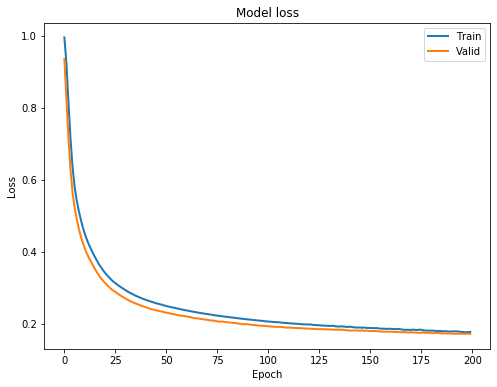

In [105]:
plt.plot(lstm_autoencoder_history['loss'], linewidth=2, label='Train')
plt.plot(lstm_autoencoder_history['val_loss'], linewidth=2, label='Valid')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

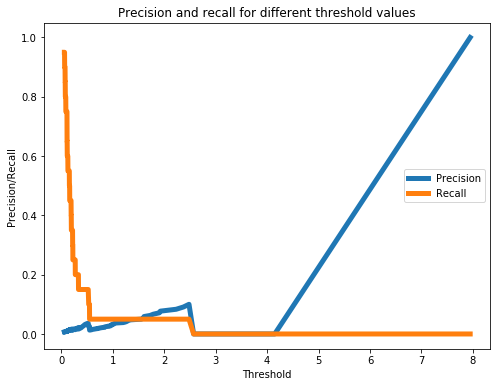

In [106]:
valid_x_predictions = lstm_autoencoder.predict(X_valid_scaled)
mse = np.mean(np.power(flatten(X_valid_scaled) - flatten(valid_x_predictions), 2), axis=1)

error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': y_valid.tolist()})

precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

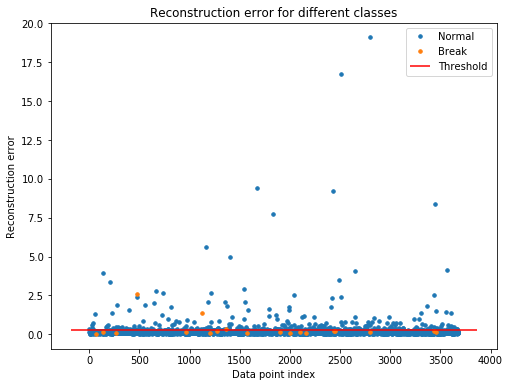

In [107]:
test_x_predictions = lstm_autoencoder.predict(X_test_scaled)
mse = np.mean(np.power(flatten(X_test_scaled) - flatten(test_x_predictions), 2), axis=1)

error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': y_test.tolist()})

threshold_fixed = 0.3
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Break" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

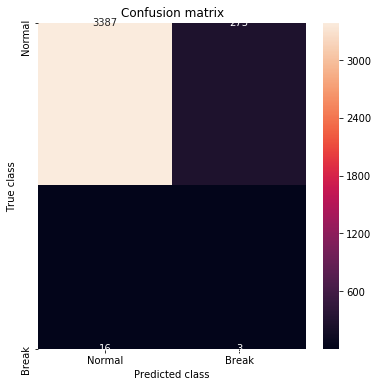

In [108]:
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, pred_y)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


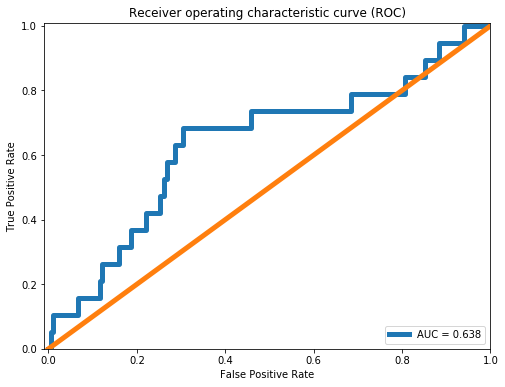

In [109]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(error_df.True_class, error_df.Reconstruction_error)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [31]:
import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score

Using TensorFlow backend.


In [59]:
scaler = StandardScaler().fit(df_train_0_x)
df_train_0_x_rescaled = scaler.transform(df_train_0_x)
df_valid_0_x_rescaled = scaler.transform(df_valid_0_x)
df_valid_x_rescaled = scaler.transform(df_valid.drop(['y'], axis = 1))

In [60]:
df_test_0_x_rescaled = scaler.transform(df_test_0_x)
df_test_x_rescaled = scaler.transform(df_test.drop(['y'], axis = 1))

In [62]:
# Autoencoder Classifier

In [61]:
nb_epoch = 100
batch_size = 128
input_dim = df_train_0_x_rescaled.shape[1] #num of predictor variables, 
encoding_dim = 32
hidden_dim = int(encoding_dim / 2)
learning_rate = 1e-3

In [63]:
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [64]:
autoencoder.compile(metrics=['accuracy'],
 loss='mean_squared_error',
 optimizer='adam')

In [65]:
cp = ModelCheckpoint(filepath="autoencoder_classifier.h5",
 save_best_only=True,
 verbose=0)

In [67]:
tb = TensorBoard(log_dir='./logs',
 histogram_freq=0,
 write_graph=True,
 write_images=True)

In [68]:
history = autoencoder.fit(df_train_0_x_rescaled, df_train_0_x_rescaled,
 epochs=nb_epoch,
 batch_size=batch_size,
 shuffle=True,
 validation_data=(df_valid_0_x_rescaled, df_valid_0_x_rescaled),
 verbose=1,
 callbacks=[cp, tb]).history



Train on 11691 samples, validate on 2924 samples


Epoch 1/100
11691/11691 [==============================] - 0s 26us/step - loss: 2.7776 - acc: 0.0605 - val_loss: 2.3103 - val_acc: 0.1088
Epoch 2/100
11691/11691 [==============================] - 0s 13us/step - loss: 1.9262 - acc: 0.1083 - val_loss: 1.6473 - val_acc: 0.0951
Epoch 3/100
11691/11691 [==============================] - 0s 11us/step - loss: 1.4099 - acc: 0.1025 - val_loss: 1.2921 - val_acc: 0.1105
Epoch 4/100
11691/11691 [==============================] - 0s 12us/step - loss: 1.1552 - acc: 0.1113 - val_loss: 1.1154 - val_acc: 0.1163
Epoch 5/100
11691/11691 [==============================] - 0s 11us/step - loss: 1.0253 - acc: 0.1297 - val_loss: 1.0148 - val_acc: 0.1382
Epoch 6/100
11691/11691 [==============================] - 0s 11us/step - loss: 0.9513 - acc: 0.1600 - val_loss: 0.9580 - val_acc: 0.1631
Epoch 7/100
11691/11691 [==============================] - 0s 10us/step - loss: 0.9066 - acc: 0.1754 - val_loss: 0.9224

11691/11691 [==============================] - 0s 11us/step - loss: 0.6803 - acc: 0.4939 - val_loss: 0.6892 - val_acc: 0.4774
Epoch 55/100
11691/11691 [==============================] - 0s 11us/step - loss: 0.6786 - acc: 0.4925 - val_loss: 0.6926 - val_acc: 0.4935
Epoch 56/100
11691/11691 [==============================] - 0s 10us/step - loss: 0.6770 - acc: 0.4906 - val_loss: 0.6883 - val_acc: 0.4945
Epoch 57/100
11691/11691 [==============================] - 0s 11us/step - loss: 0.6784 - acc: 0.4899 - val_loss: 0.6932 - val_acc: 0.4726
Epoch 58/100
11691/11691 [==============================] - 0s 10us/step - loss: 0.6771 - acc: 0.4903 - val_loss: 0.6868 - val_acc: 0.4979
Epoch 59/100
11691/11691 [==============================] - 0s 12us/step - loss: 0.6759 - acc: 0.4917 - val_loss: 0.6851 - val_acc: 0.4976
Epoch 60/100
11691/11691 [==============================] - 0s 11us/step - loss: 0.6765 - acc: 0.4919 - val_loss: 0.6832 - val_acc: 0.4979
Epoch 61/100
11691/11691 [==============

In [69]:
valid_x_predictions = autoencoder.predict(df_valid_x_rescaled)
mse = np.mean(np.power(df_valid_x_rescaled - valid_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
 'True_class': df_valid['y']})

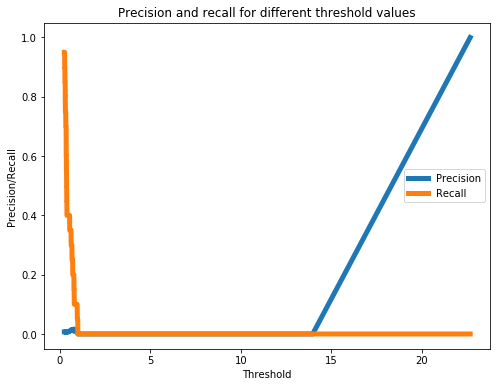

In [70]:
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

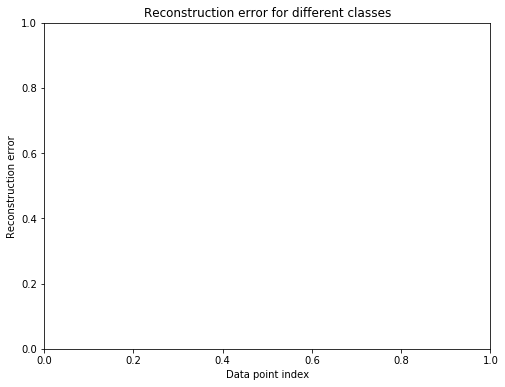

In [77]:
for name, group in groups:
 ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
 label= "Break" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

In [78]:
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]

In [79]:
conf_matrix = confusion_matrix(error_df.True_class, pred_y)

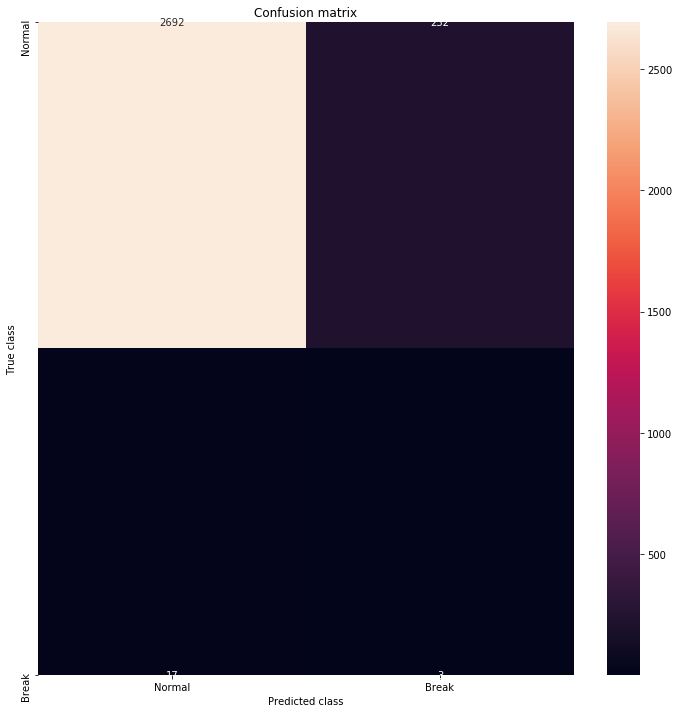

In [80]:
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()